# COVID-19 Data Analysis and prediction using Facebook prophet model

### **Necessary libraries**

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install fbprophet

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np

## **DataSet**   
        The dataset used in this covid19 prediction and analysis project in India are obtained from kaggle,

1.   covid_19_india.csv that contains the data of date, Time, State/
Union territory, Confirmed cases,deaths and cured cases.
2.   StatewiseTestingDetails.csv  contains the test data of all the states and Unionterritory.


        

In [ ]:
#importing main dataset 
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
5646,5647,2020-08-27,8:00 AM,Telengana,-,-,86095,788,114483
5647,5648,2020-08-27,8:00 AM,Tripura,-,-,6697,85,9908
5648,5649,2020-08-27,8:00 AM,Uttarakhand,-,-,11524,219,16549
5649,5650,2020-08-27,8:00 AM,Uttar Pradesh,-,-,148562,3149,203028
5650,5651,2020-08-27,8:00 AM,West Bengal,-,-,117857,2964,147775


Changing the column names

In [ ]:
#keeping only required columns
df= df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

df.columns=['date', 'state','cured','deaths','confirmed' ]

In [ ]:
#Looking at the earlier dates
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


Today's covid data

In [ ]:
#current date
today = df[df.date == '2020-08-27']

In [ ]:
today.shape

(35, 5)

In [ ]:
today

,date,state,cured,deaths,confirmed
5616,2020-08-27,Andaman and Nicobar Islands,2309,41,2985
5617,2020-08-27,Andhra Pradesh,286720,3541,382469
5618,2020-08-27,Arunachal Pradesh,2563,5,3555
5619,2020-08-27,Assam,76962,274,96771
5620,2020-08-27,Bihar,106361,530,126714
5621,2020-08-27,Chandigarh,1796,41,3376
5622,2020-08-27,Chhattisgarh,14145,231,24550
5623,2020-08-27,Dadra and Nagar Haveli and Daman and Diu,1862,2,2228
5624,2020-08-27,Delhi,148897,4347,165764
5625,2020-08-27,Goa,11511,165,15027


Most affected States

In [ ]:
#Sorting data w.r.t number of confirmed cases
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
5635,2020-08-27,Maharashtra,522427,23089,718711
5645,2020-08-27,Tamil Nadu,338060,6839,397261
5617,2020-08-27,Andhra Pradesh,286720,3541,382469
5631,2020-08-27,Karnataka,211688,5091,300406
5649,2020-08-27,Uttar Pradesh,148562,3149,203028
5624,2020-08-27,Delhi,148897,4347,165764
5650,2020-08-27,West Bengal,117857,2964,147775
5620,2020-08-27,Bihar,106361,530,126714
5646,2020-08-27,Telengana,86095,788,114483
5619,2020-08-27,Assam,76962,274,96771


In [ ]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]

Visualizing the top 5 most covid-19 affected states

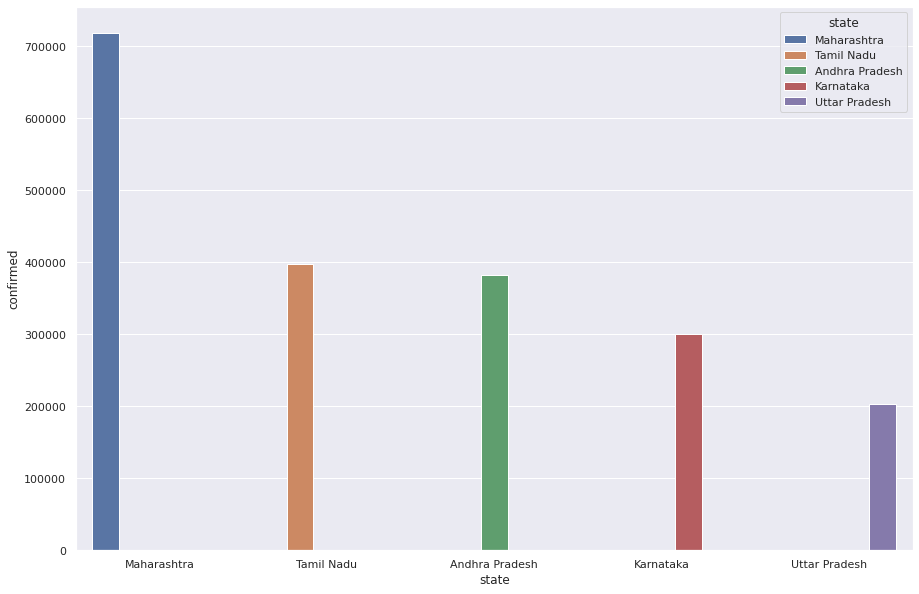

In [ ]:
#Making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [ ]:
#Sorting data w.r.t number of death cases
max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
5635,2020-08-27,Maharashtra,522427,23089,718711
5645,2020-08-27,Tamil Nadu,338060,6839,397261
5631,2020-08-27,Karnataka,211688,5091,300406
5624,2020-08-27,Delhi,148897,4347,165764
5617,2020-08-27,Andhra Pradesh,286720,3541,382469
5649,2020-08-27,Uttar Pradesh,148562,3149,203028
5650,2020-08-27,West Bengal,117857,2964,147775
5626,2020-08-27,Gujarat,72282,2945,89994
5634,2020-08-27,Madhya Pradesh,43246,1282,56864
5642,2020-08-27,Punjab,30231,1219,46090


Visualizing States with most number of deaths

In [ ]:
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:5]

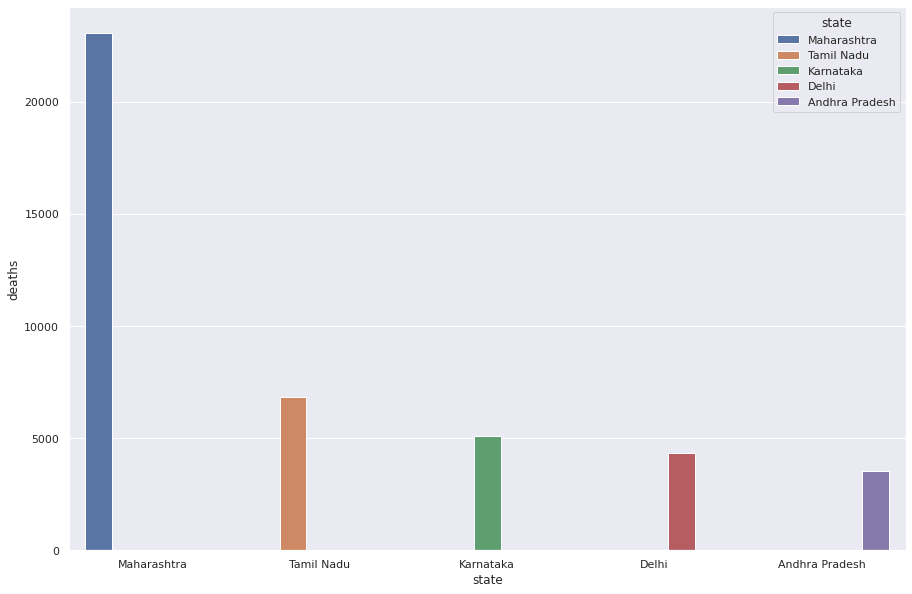

In [ ]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

Visualizing the states with more covid recovery cases

In [ ]:
#Sorting data w.r.t number of cured cases
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
5635,2020-08-27,Maharashtra,522427,23089,718711
5645,2020-08-27,Tamil Nadu,338060,6839,397261
5617,2020-08-27,Andhra Pradesh,286720,3541,382469
5631,2020-08-27,Karnataka,211688,5091,300406
5624,2020-08-27,Delhi,148897,4347,165764
5649,2020-08-27,Uttar Pradesh,148562,3149,203028
5650,2020-08-27,West Bengal,117857,2964,147775
5620,2020-08-27,Bihar,106361,530,126714
5646,2020-08-27,Telengana,86095,788,114483
5619,2020-08-27,Assam,76962,274,96771


In [ ]:
#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:5]

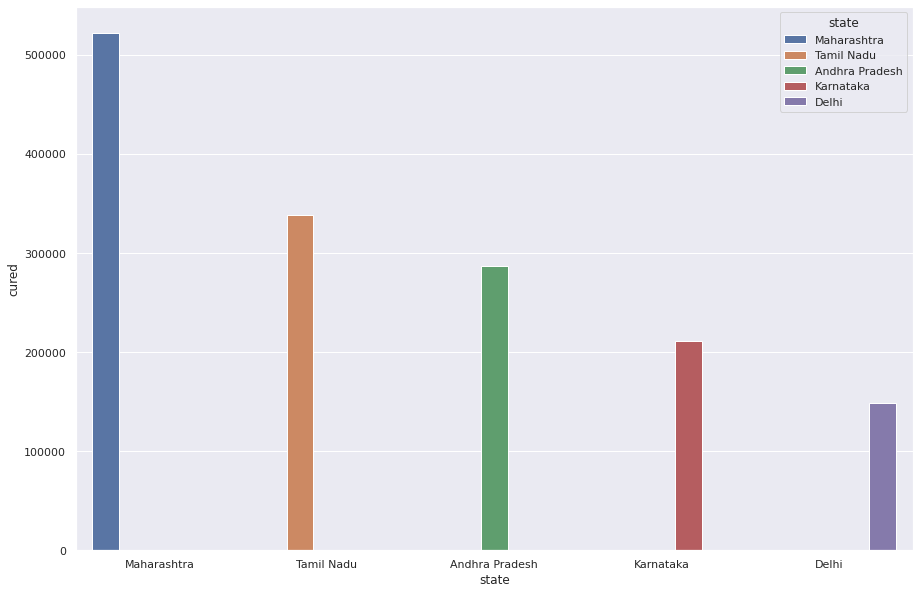

In [ ]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

In [ ]:

TN = df[df['state'] == 'Tamil Nadu']

In [ ]:
TN

,date,state,cured,deaths,confirmed
61,2020-03-07,Tamil Nadu,0,0,1
67,2020-03-08,Tamil Nadu,0,0,1
79,2020-03-09,Tamil Nadu,0,0,1
94,2020-03-10,Tamil Nadu,0,0,1
105,2020-03-11,Tamil Nadu,0,0,1
...,...,...,...,...,...
5505,2020-08-23,Tamil Nadu,313280,6420,373410
5540,2020-08-24,Tamil Nadu,319327,6517,379385
5575,2020-08-25,Tamil Nadu,325456,6614,385352
5610,2020-08-26,Tamil Nadu,332454,6721,391303


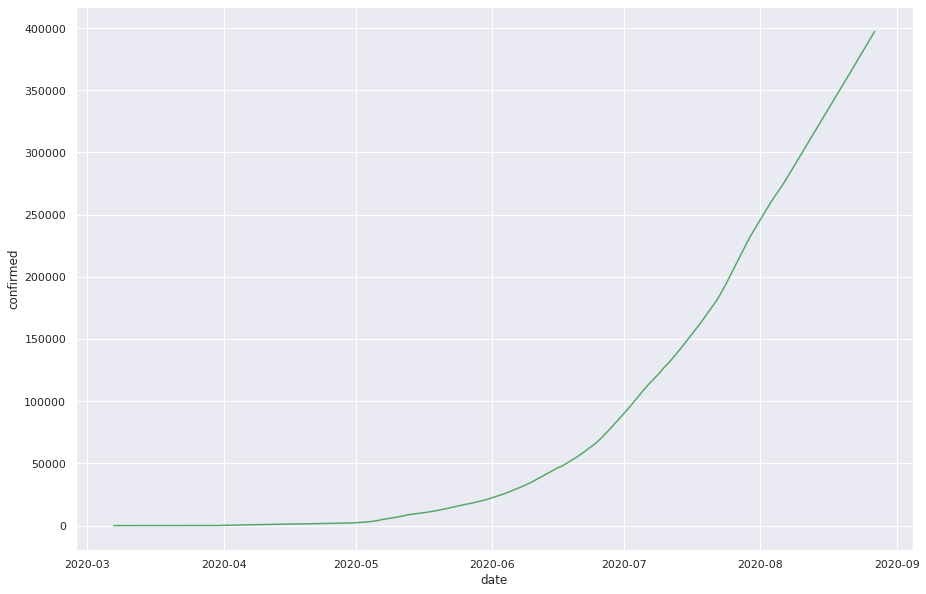

In [ ]:
#Visualizing confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=TN,color="g")
plt.show()

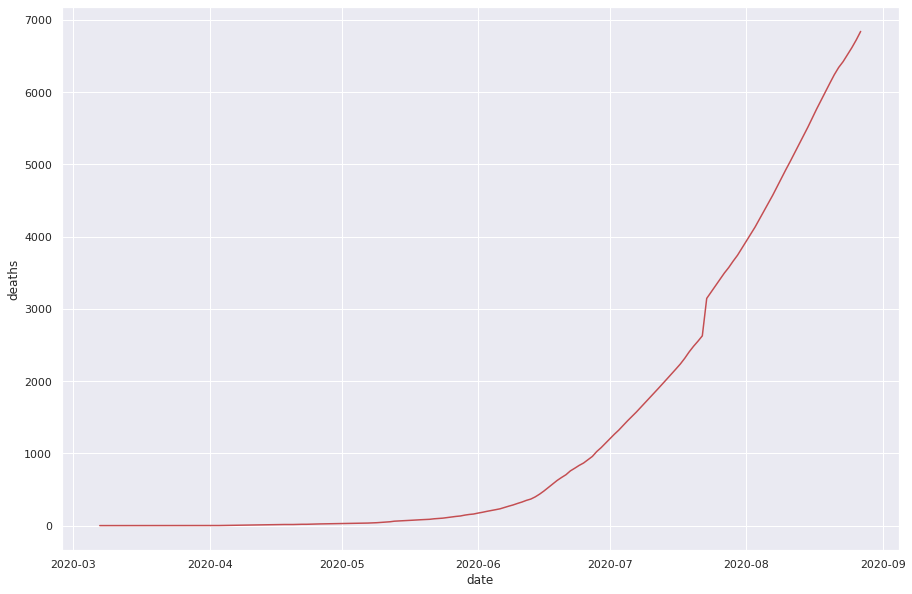

In [ ]:
#Visualizing death cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=TN,color="r")
plt.show()

In [ ]:
#kerala
kerala= df[df['state'] == 'Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
5492,2020-08-23,Kerala,36535,218,56354
5527,2020-08-24,Kerala,37645,223,58262
5562,2020-08-25,Kerala,38883,234,59504
5597,2020-08-26,Kerala,40339,244,61879


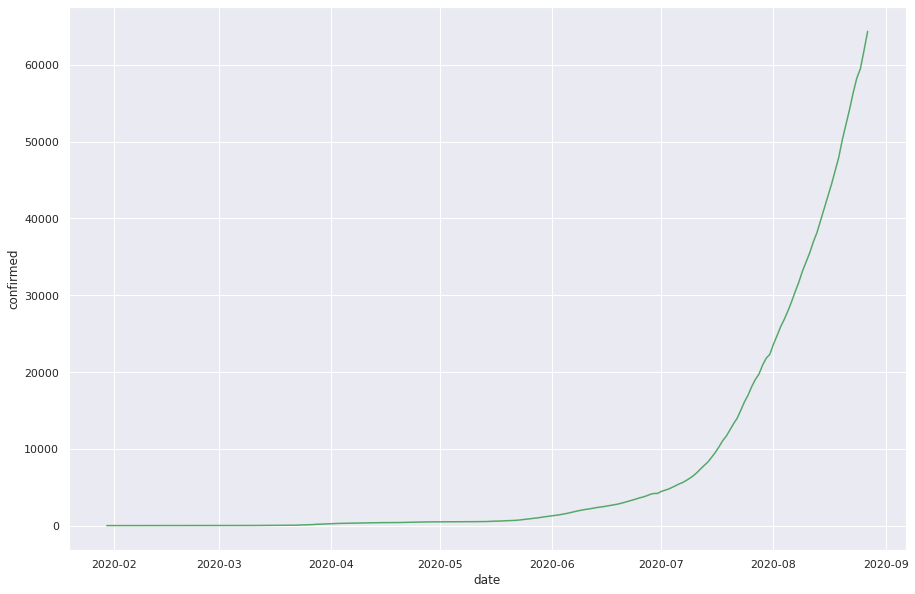

In [ ]:
#Visualizing confirmed cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")
plt.show()

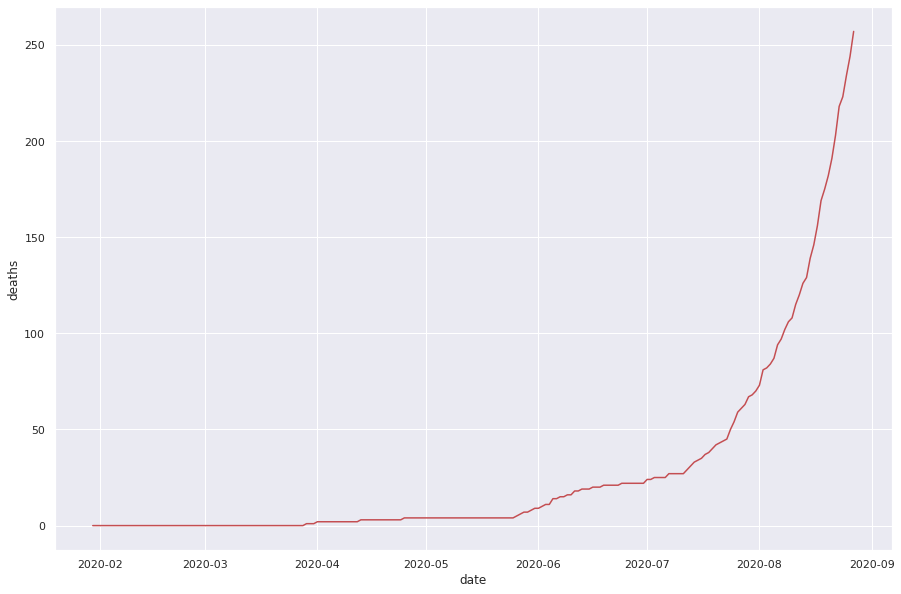

In [ ]:
#Visualizing death cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")
plt.show()

In [ ]:
#Jammu and Kashmir
jk= df[df['state'] == 'Jammu and Kashmir']
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
5489,2020-08-23,Jammu and Kashmir,24398,608,31981
5524,2020-08-24,Jammu and Kashmir,24832,617,32647
5559,2020-08-25,Jammu and Kashmir,25205,624,33075
5594,2020-08-26,Jammu and Kashmir,25594,638,33776


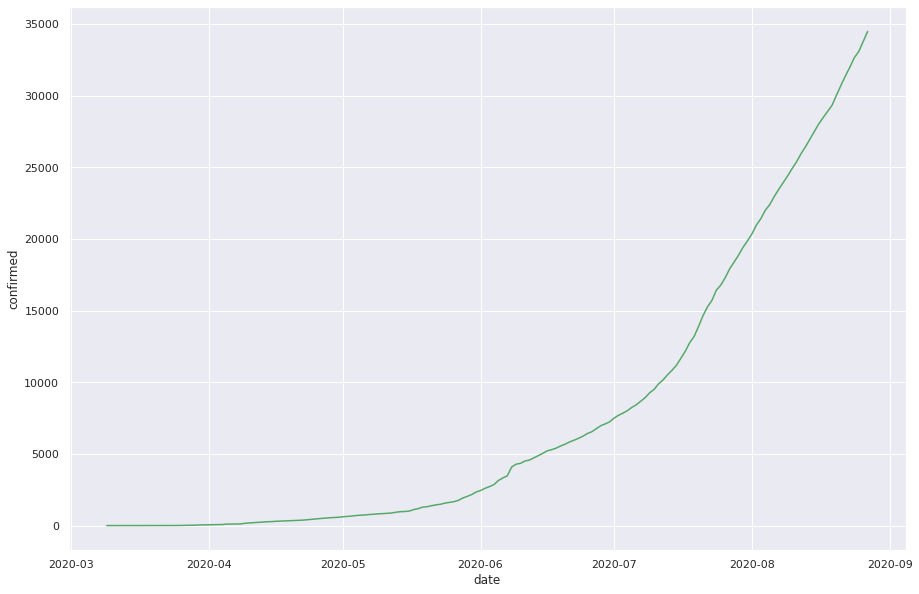

In [ ]:
#Visualizing confirmed cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")
plt.show()

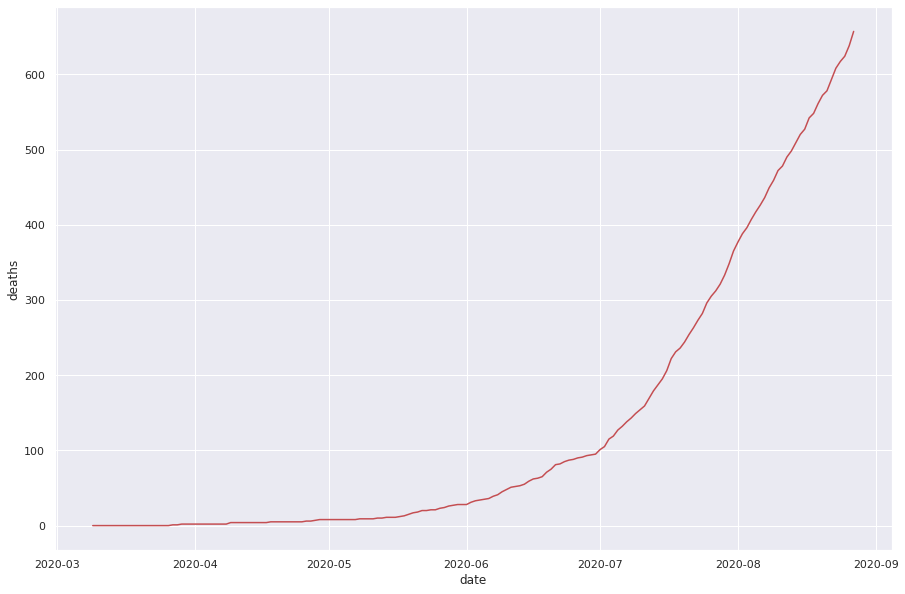

In [ ]:
#Visualizing death cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=jk,color="r")
plt.show()

# Test Report of Each States

In [ ]:
#Checking state-wise testing details
tests = pd.read_csv('StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
4532,2020-08-21,West Bengal,1487844.0,NaN,132364.0
4533,2020-08-22,West Bengal,1524162.0,NaN,135596.0
4534,2020-08-23,West Bengal,1561311.0,NaN,NaN
4535,2020-08-24,West Bengal,1596578.0,NaN,NaN


In [ ]:
test_latest =  tests[tests.Date == '2020-08-25']

In [ ]:
test_latest

,Date,State,TotalSamples,Negative,Positive
240,2020-08-25,Andhra Pradesh,3356852.0,2985213,NaN
368,2020-08-25,Arunachal Pradesh,149273.0,141127,NaN
487,2020-08-25,Assam,2035216.0,NaN,NaN
626,2020-08-25,Bihar,2570097.0,NaN,NaN
764,2020-08-25,Chandigarh,26348.0,22934,NaN
896,2020-08-25,Chhattisgarh,505193.0,NaN,NaN
1150,2020-08-25,Delhi,1462845.0,NaN,NaN
1283,2020-08-25,Goa,184872.0,NaN,NaN
1422,2020-08-25,Gujarat,1891775.0,NaN,88942.0
1564,2020-08-25,Haryana,1001781.0,938914,56608.0


States conducts more number of testing:

In [ ]:
#Sorting data w.r.t number of cured cases
max_tests_State=test_latest.sort_values(by="TotalSamples",ascending=False)
max_tests_State

,Date,State,TotalSamples,Negative,Positive
4252,2020-08-25,Uttar Pradesh,4796488.0,NaN,NaN
3918,2020-08-25,Tamil Nadu,4346861.0,NaN,NaN
2646,2020-08-25,Maharashtra,3711123.0,2994256,NaN
240,2020-08-25,Andhra Pradesh,3356852.0,2985213,NaN
626,2020-08-25,Bihar,2570097.0,NaN,NaN
2117,2020-08-25,Karnataka,2513555.0,NaN,NaN
3668,2020-08-25,Rajasthan,2166744.0,2091316,NaN
487,2020-08-25,Assam,2035216.0,NaN,NaN
1422,2020-08-25,Gujarat,1891775.0,NaN,88942.0
4536,2020-08-25,West Bengal,1634102.0,NaN,NaN


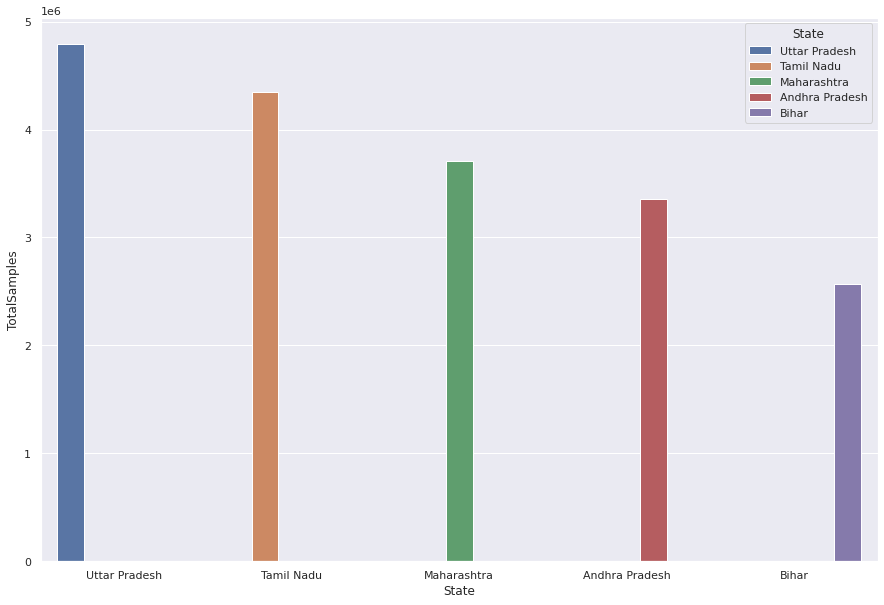

In [ ]:
#Making bar-plot for states with max test cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="State",y="TotalSamples",data=max_tests_State[0:5],hue="State")
plt.show()

# **Predicting the covid 19 cases using Facebook's Prophet**
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['cured'].reset_index()

In [ ]:
confirmed.tail()

,date,confirmed
206,2020-08-23,3044940
207,2020-08-24,3106348
208,2020-08-25,3167323
209,2020-08-26,3234474
210,2020-08-27,3310234


###  **Predicting the Confirmed Cases:**

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
213,2020-08-30
214,2020-08-31
215,2020-09-01
216,2020-09-02
217,2020-09-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-30,3.354564e+06,3.298256e+06,3.415177e+06
214,2020-08-31,3.409775e+06,3.350273e+06,3.463844e+06
215,2020-09-01,3.464219e+06,3.405243e+06,3.522875e+06
216,2020-09-02,3.519635e+06,3.461883e+06,3.581190e+06
217,2020-09-03,3.575265e+06,3.514186e+06,3.635508e+06


plotting the prediction of confirmed cases

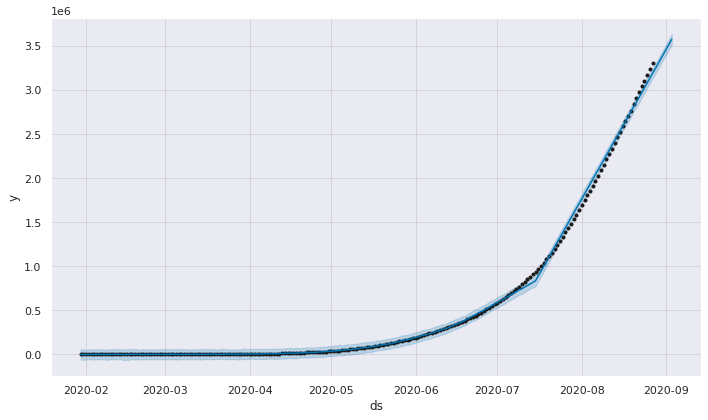

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

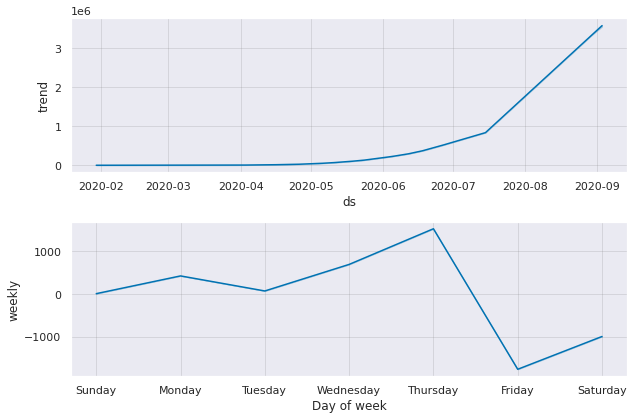

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

### **Prediction of Deaths** 

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
213,2020-08-30
214,2020-08-31
215,2020-09-01
216,2020-09-02
217,2020-09-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-30,61657.297823,60972.297800,62352.938771
214,2020-08-31,62480.738693,61768.964840,63173.609442
215,2020-09-01,63299.426649,62535.750336,64003.731752
216,2020-09-02,64202.047683,63395.967578,65010.129744
217,2020-09-03,65050.974828,64250.537820,65868.214253


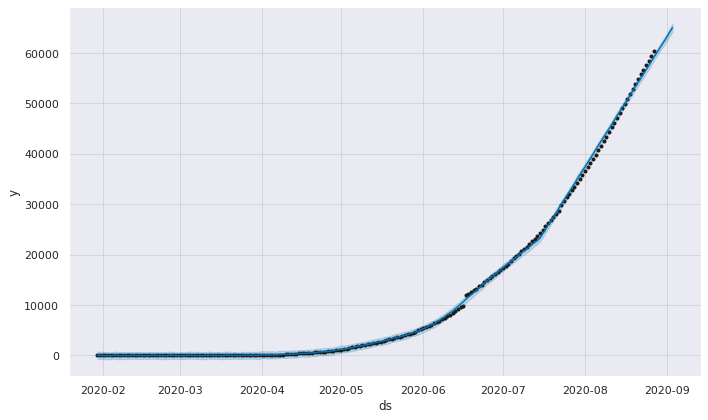

In [ ]:
deaths_forecast_plot = m.plot(forecast)

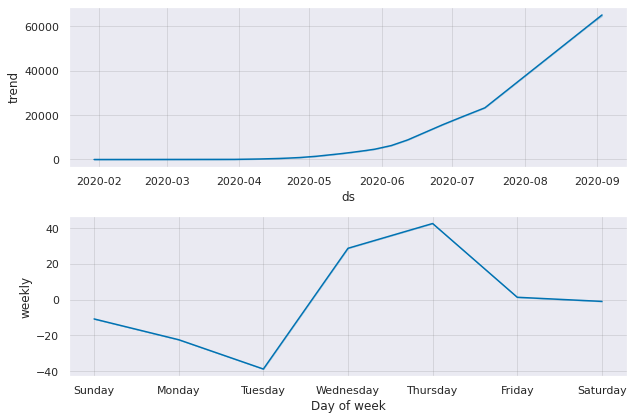

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

### **Predicting the recovery of the cases**

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
213,2020-08-30
214,2020-08-31
215,2020-09-01
216,2020-09-02
217,2020-09-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-30,2.477885e+06,2.391405e+06,2.565550e+06
214,2020-08-31,2.521959e+06,2.438255e+06,2.606261e+06
215,2020-09-01,2.566523e+06,2.486331e+06,2.647581e+06
216,2020-09-02,2.611857e+06,2.526991e+06,2.693441e+06
217,2020-09-03,2.655613e+06,2.575173e+06,2.747239e+06


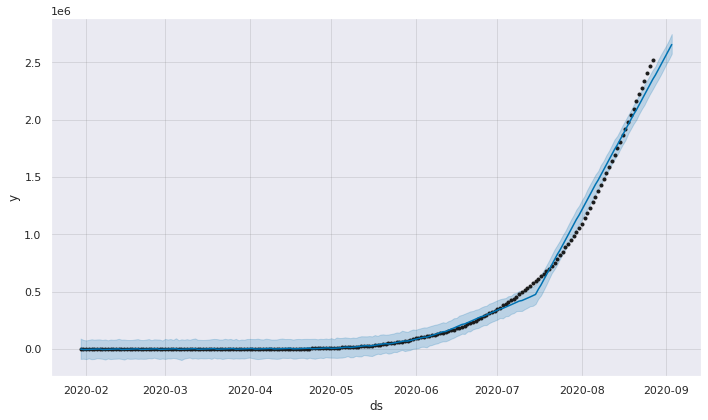

In [ ]:
recovered_forecast_plot = m.plot(forecast)

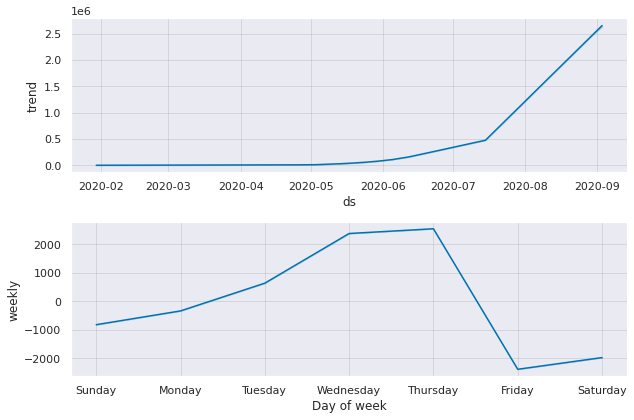

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)